In [1]:
from magpi.prelude import *
from magpi.r_fun import r0, sphere, translate
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LightSource

%matplotlib widget

In [2]:
# create Pacman ADF from R0 system

unit_vec = lambda x: x / jnp.linalg.norm(x, axis=-1, keepdims=True)
mouth = r0.intersection(
    lambda x: jnp.dot(x, unit_vec(jnp.array([1., 0., -1.8]))),
    lambda x: jnp.dot(x, unit_vec(jnp.array([1., 0., 1.8])))
)
left_eye = translate(sphere(0.25), [0.4, -0.5, 0.6])
right_eye = translate(sphere(0.25), [0.4, 0.5, 0.6])
pacman = r0.difference(sphere(1.), mouth)
pacman = r0.union(pacman, left_eye)
pacman = r0.union(pacman, right_eye)
pacman = r0.union(pacman, translate(sphere(0.15), [1., 0., 0]))
pacman = r0.union(pacman, translate(sphere(0.15), [2., 0., 0]))
pacman = jax.jit(pacman)

I0000 00:00:1699548776.417086   16028 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
2023-11-09 17:52:58.848142: W external/xla/xla/service/gpu/nvptx_compiler.cc:708] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.1.105). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


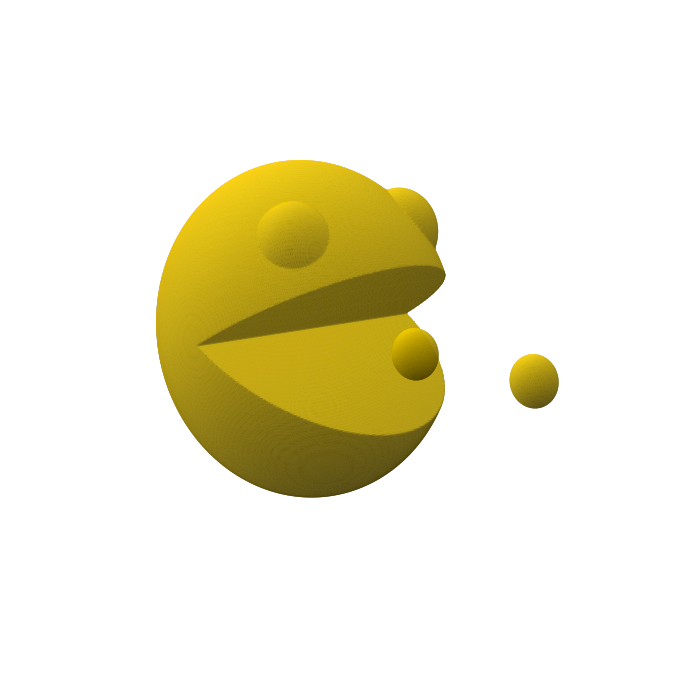

In [7]:
resolution = 400
X = jnp.meshgrid(
    jnp.linspace(-1.5, 2.5, resolution),
    jnp.linspace(-1.5, 1.5, resolution),
    jnp.linspace(-1.5, 1.5, resolution),
)
X = jnp.stack(X, axis=-1)
Z = jnp.apply_along_axis(pacman, -1, X)
Z = np.array(Z)
verts, faces, normals, values = measure.marching_cubes(
    Z, 0., 
    spacing=(1 / resolution, 1 / resolution, 1 / resolution)
)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ls = LightSource(-181, -121)
mesh = Poly3DCollection(
    verts[faces], 
    alpha=1.0,
    shade=True,
    lightsource=ls,
    facecolors="gold",
)

ax.add_collection3d(mesh)


ax.set_xlim(0., 1)
ax.set_ylim(0.2, 0.8)
ax.set_zlim(0.2, 0.8)
ax.view_init(11, 50)
plt.axis("off")
plt.tight_layout()

In [8]:
fig.savefig('pacman.png', transparent=True)